In [107]:
#import all the necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Importing the data

In [108]:
#Reading the country data set
Country_df = pd.read_csv("Country-data.csv")
Country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [109]:
#shape of the data set
Country_df.shape

(167, 10)

#### There are 167 rows and 10 columns in the data set

In [110]:
#info about the data set
Country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### Checking missing values

In [111]:
#Checking missing values
Country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### Comment :
    There is No missing values in the country.df dataset

In [112]:
#Checking percentage of missing values
round(100*(Country_df.isnull().sum())/len(Country_df), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [113]:
#Converting Exports of goods into actual value from the value given as perctage of gdpp
Country_df["exports"]=(Country_df["exports"]/100)*Country_df["gdpp"]
Country_df["exports"]

0        55.30
1      1145.20
2      1712.64
3      2199.19
4      5551.00
        ...   
162    1384.02
163    3847.50
164     943.20
165     393.00
166     540.20
Name: exports, Length: 167, dtype: float64

In [114]:
#Converting total health spending into actual value from the value given as perctage of gdpp
Country_df["health"]=(Country_df["health"]/100)*Country_df["gdpp"]
Country_df["health"]

0       41.9174
1      267.8950
2      185.9820
3      100.6050
4      735.6600
         ...   
162    155.9250
163    662.8500
164     89.6040
165     67.8580
166     85.9940
Name: health, Length: 167, dtype: float64

In [115]:
#Converting Imports of goods into actual value from the value given as perctage of gdpp
Country_df["imports"]=(Country_df["imports"]/100)*Country_df["gdpp"]
Country_df["imports"]

0       248.297
1      1987.740
2      1400.440
3      1514.370
4      7185.800
         ...   
162    1565.190
163    2376.000
164    1050.620
165     450.640
166     451.140
Name: imports, Length: 167, dtype: float64

In [116]:
# data set after required pre processing done.
Country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [117]:
Country_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

### Performing EDA

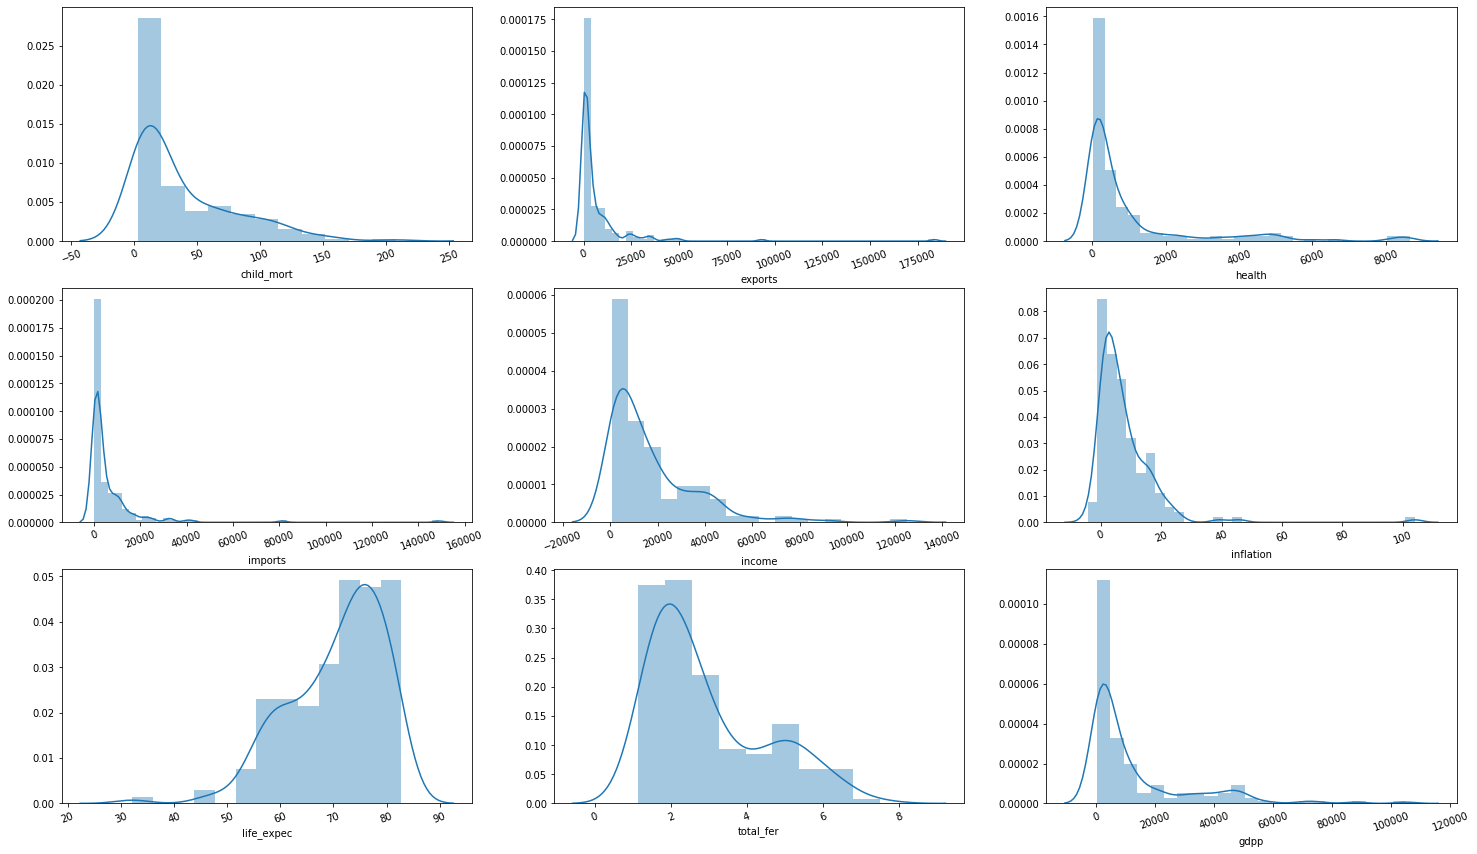

In [118]:
#univariate Analysis
plt.figure(figsize=(25,25))
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features): 
    ax = plt.subplot(5, 3, i[0]+1)
    sns.distplot(Country_df[i[1]])
    plt.xticks(rotation = 20)

### Checking Outliers for all the numerical columns

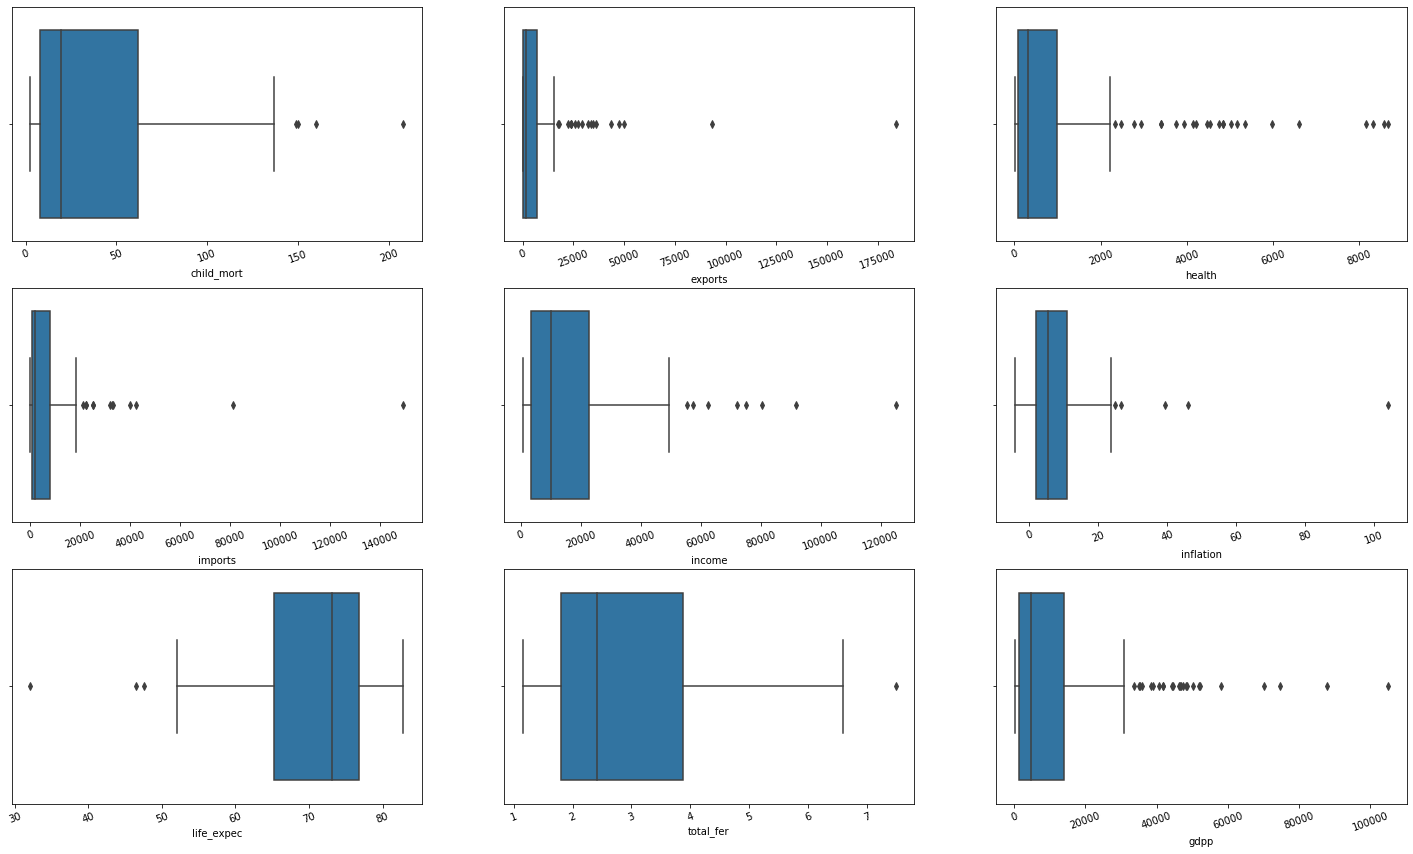

In [119]:
plt.figure(figsize=(25,25))
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features): 
    ax = plt.subplot(5, 3, i[0]+1)
    sns.boxplot(x=i[1], data=Country_df)
    plt.xticks(rotation = 20)

### Comment 
   There are outliers in all the numerical columns and treating them by using capping method

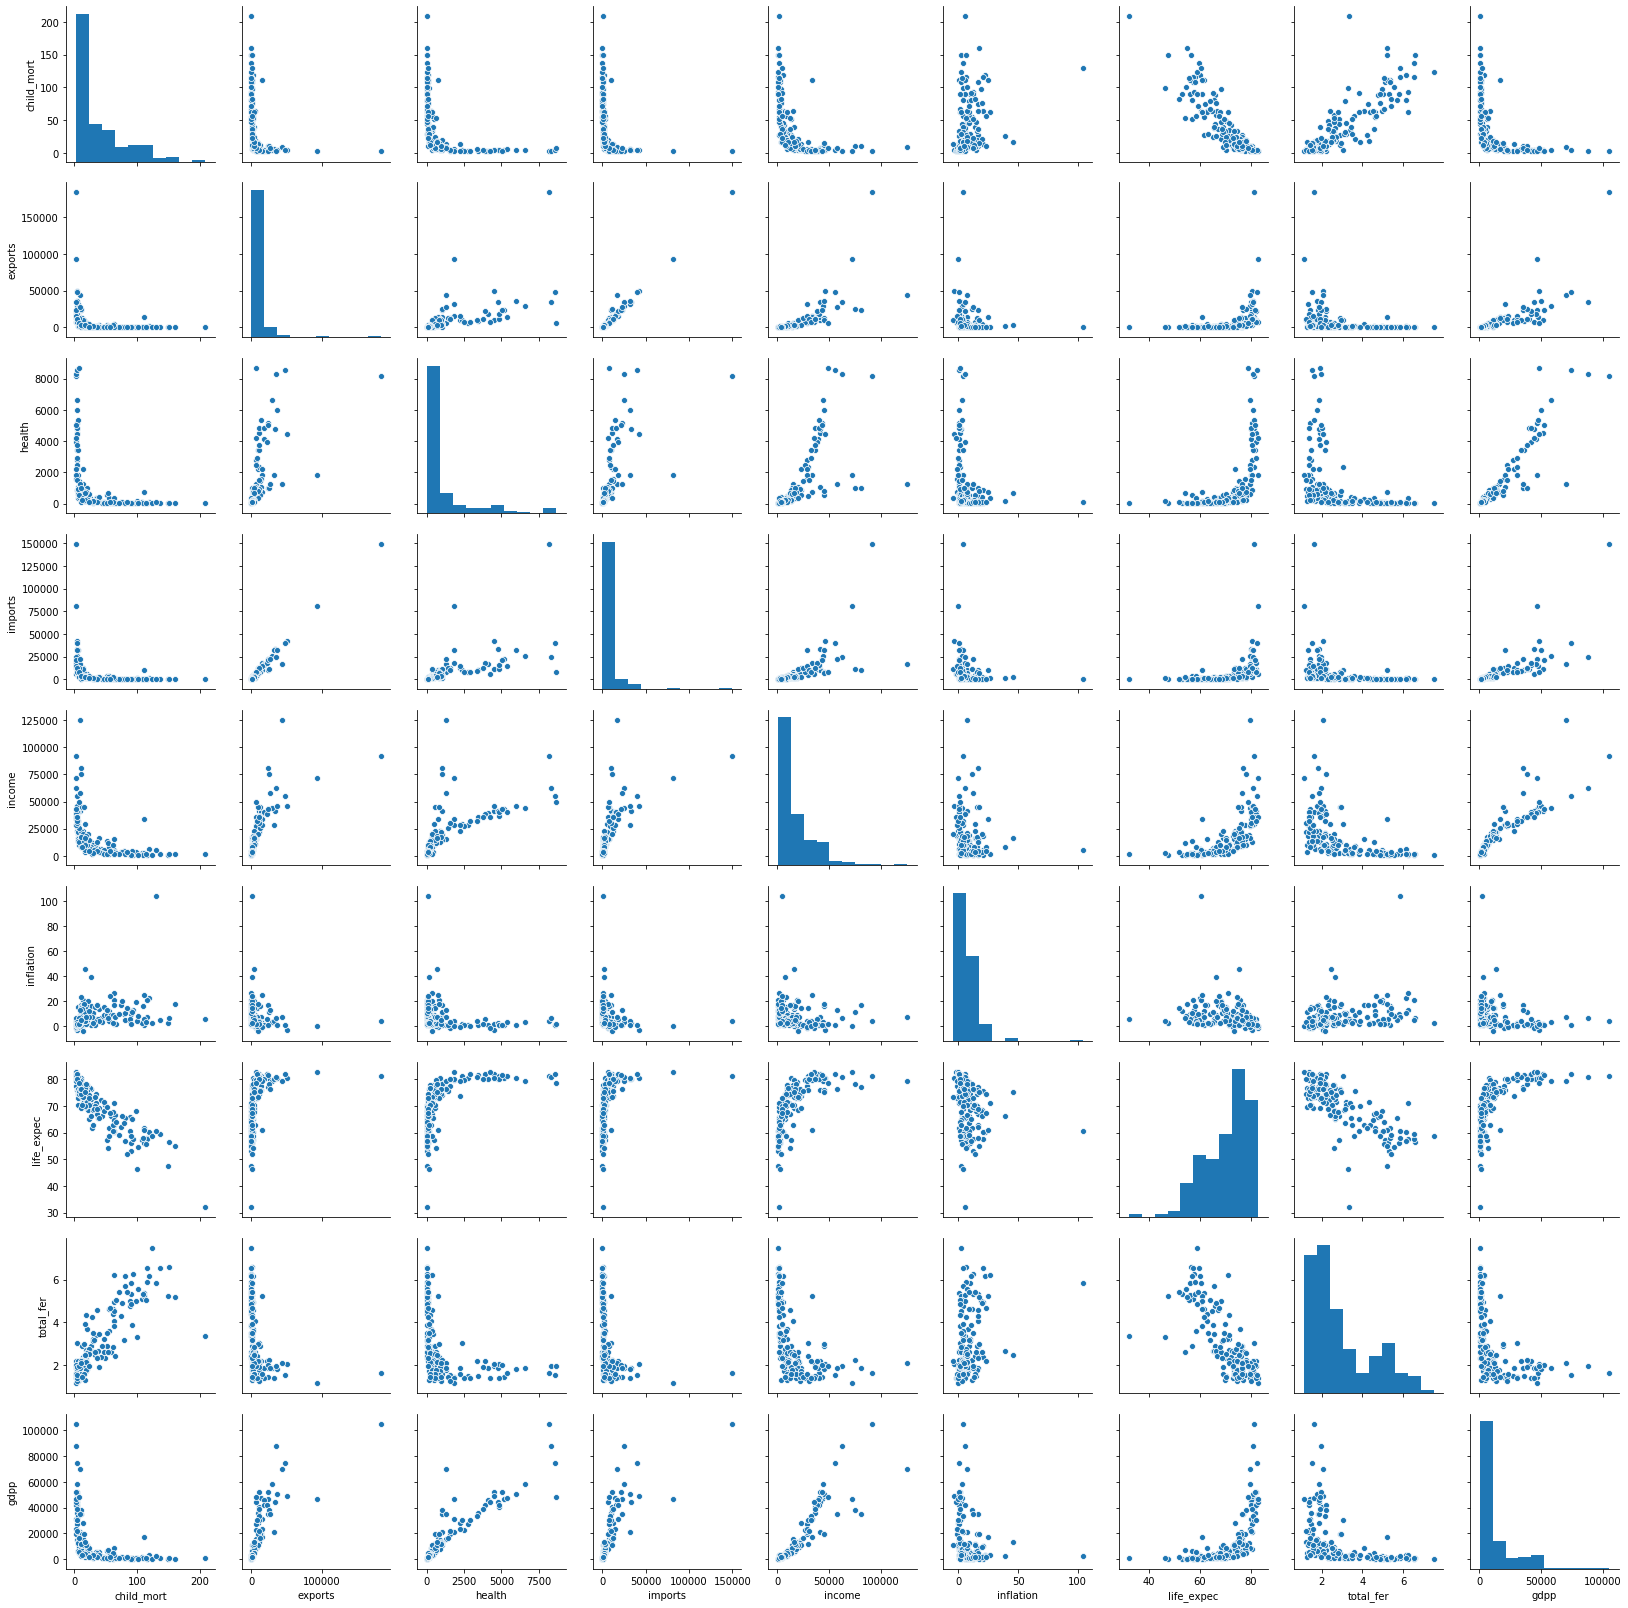

In [120]:
#Visualizing using pair plot
sns.pairplot(Country_df)

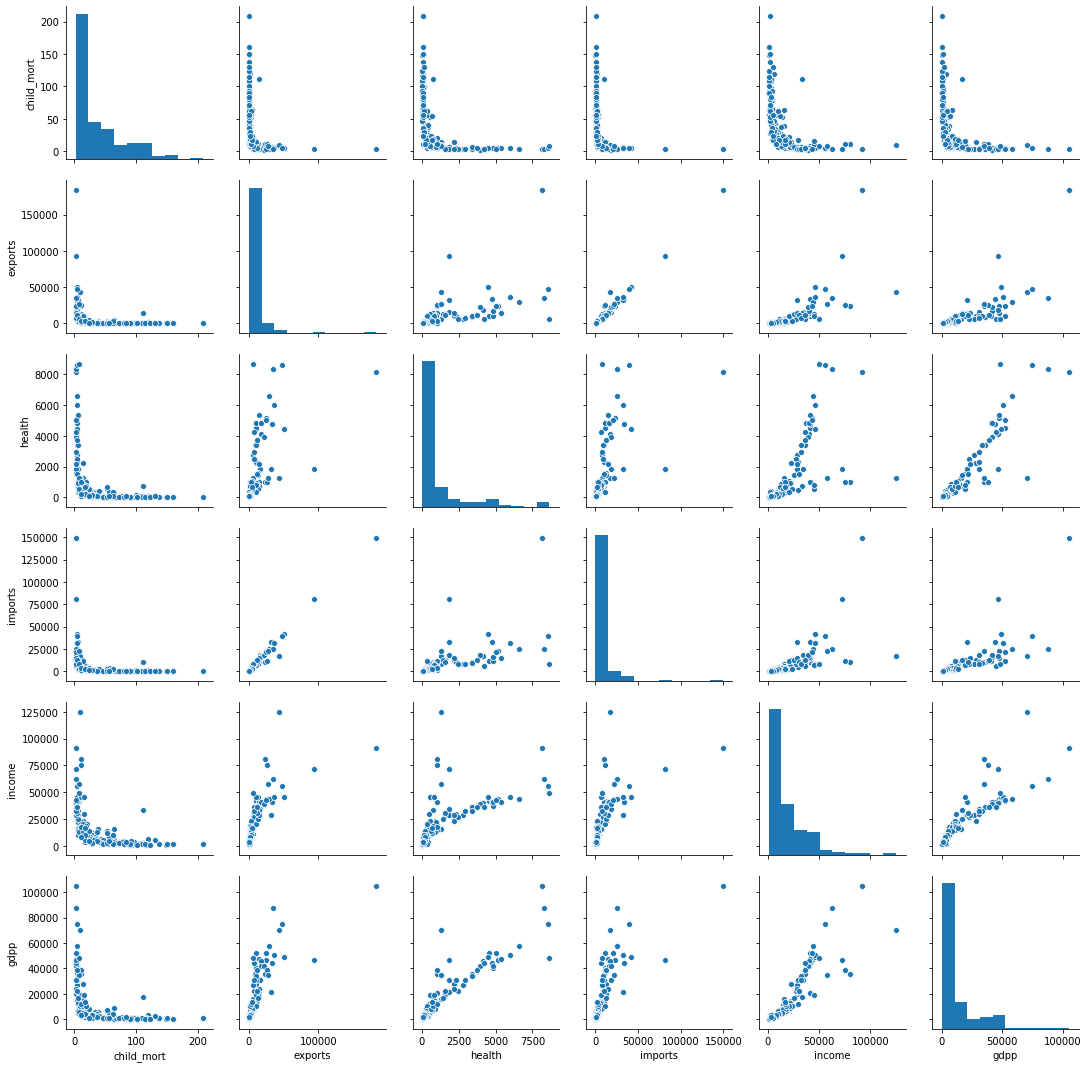

In [121]:
#bivariate analysis
sns.pairplot(Country_df[['child_mort', 'exports', 'health', 'imports', 'income','gdpp']])

In [122]:
columns=['country', 'child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']

### Treating outliers in all the columns by using capping method

In [123]:
Q4=Country_df.quantile(0.99)
for col in columns[1:]:
    print(col,Q4[col])
    Country_df[col][Country_df[col]>Q4[col]]=Q4[col]

child_mort 153.40000000000003
exports 64794.26000000014
health 8410.3304
imports 55371.39000000013
income 84374.00000000003
inflation 41.47800000000002
life_expec 82.37
total_fer 6.563599999999999
gdpp 79088.00000000004


### Checking Hopkins

In [124]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [126]:
#Let's check the Hopkins measure
hopkins(Country_df.drop('country', axis = 1))

0.8645775790635938

### Scaling the data

In [127]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc=sc.fit(Country_df.iloc[:,1:])
Country_df_scaled=sc.transform(Country_df.iloc[:,1:])
Country_df_scaled

array([[ 1.34400562, -0.56962212, -0.56695778, ..., -1.61970522,
         1.92639646, -0.70225949],
       [-0.54749743, -0.47385792, -0.4403934 , ...,  0.64883094,
        -0.86505432, -0.49872564],
       [-0.27250989, -0.42399973, -0.48627082, ...,  0.67140344,
        -0.03498262, -0.47743428],
       ...,
       [-0.37530897, -0.49160668, -0.54024972, ...,  0.28767096,
        -0.66423052, -0.65869853],
       [ 0.47278343, -0.53995007, -0.55242911, ..., -0.34435902,
         1.15657191, -0.65869853],
       [ 1.16153726, -0.52701632, -0.54227159, ..., -2.09372771,
         1.64524315, -0.6500669 ]])

### Silhouette score analysis

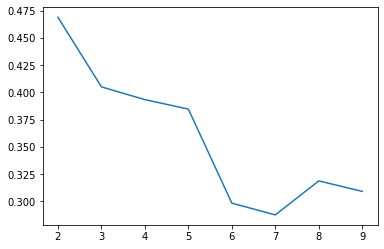

In [128]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(Country_df_scaled)
    ss.append([k, silhouette_score(Country_df_scaled, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

#### Comment :
  K=3 is the optimal number of clusters.

### Elbow curve method

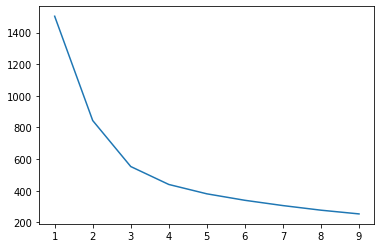

In [129]:
#Now let's proceed to the elbow curve method
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(Country_df_scaled)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

#### Comment :
    Optimal k value in elbow curve method is 2 but doing clustering with k=2 doesnt make any sense so here i choose K value is 3 from silhouette curve

## KMeans with the K we have choosed

In [130]:
#Let's perform K means using K=3
kmean = KMeans(n_clusters = 3, max_iter = 100, random_state = 50)
kmean.fit(Country_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [131]:
## Let's make a copy of our original data before using it for analysis
df_org = Country_df.copy()

In [132]:
col = Country_df.columns
col

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [133]:
Country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [134]:
# Let's add the cluster Ids to the original data 
Country_df = pd.concat([Country_df.reset_index().drop('index', axis = 1), pd.Series(kmean.labels_)], axis = 1)
Country_df.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp', 'cluster_id']
Country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


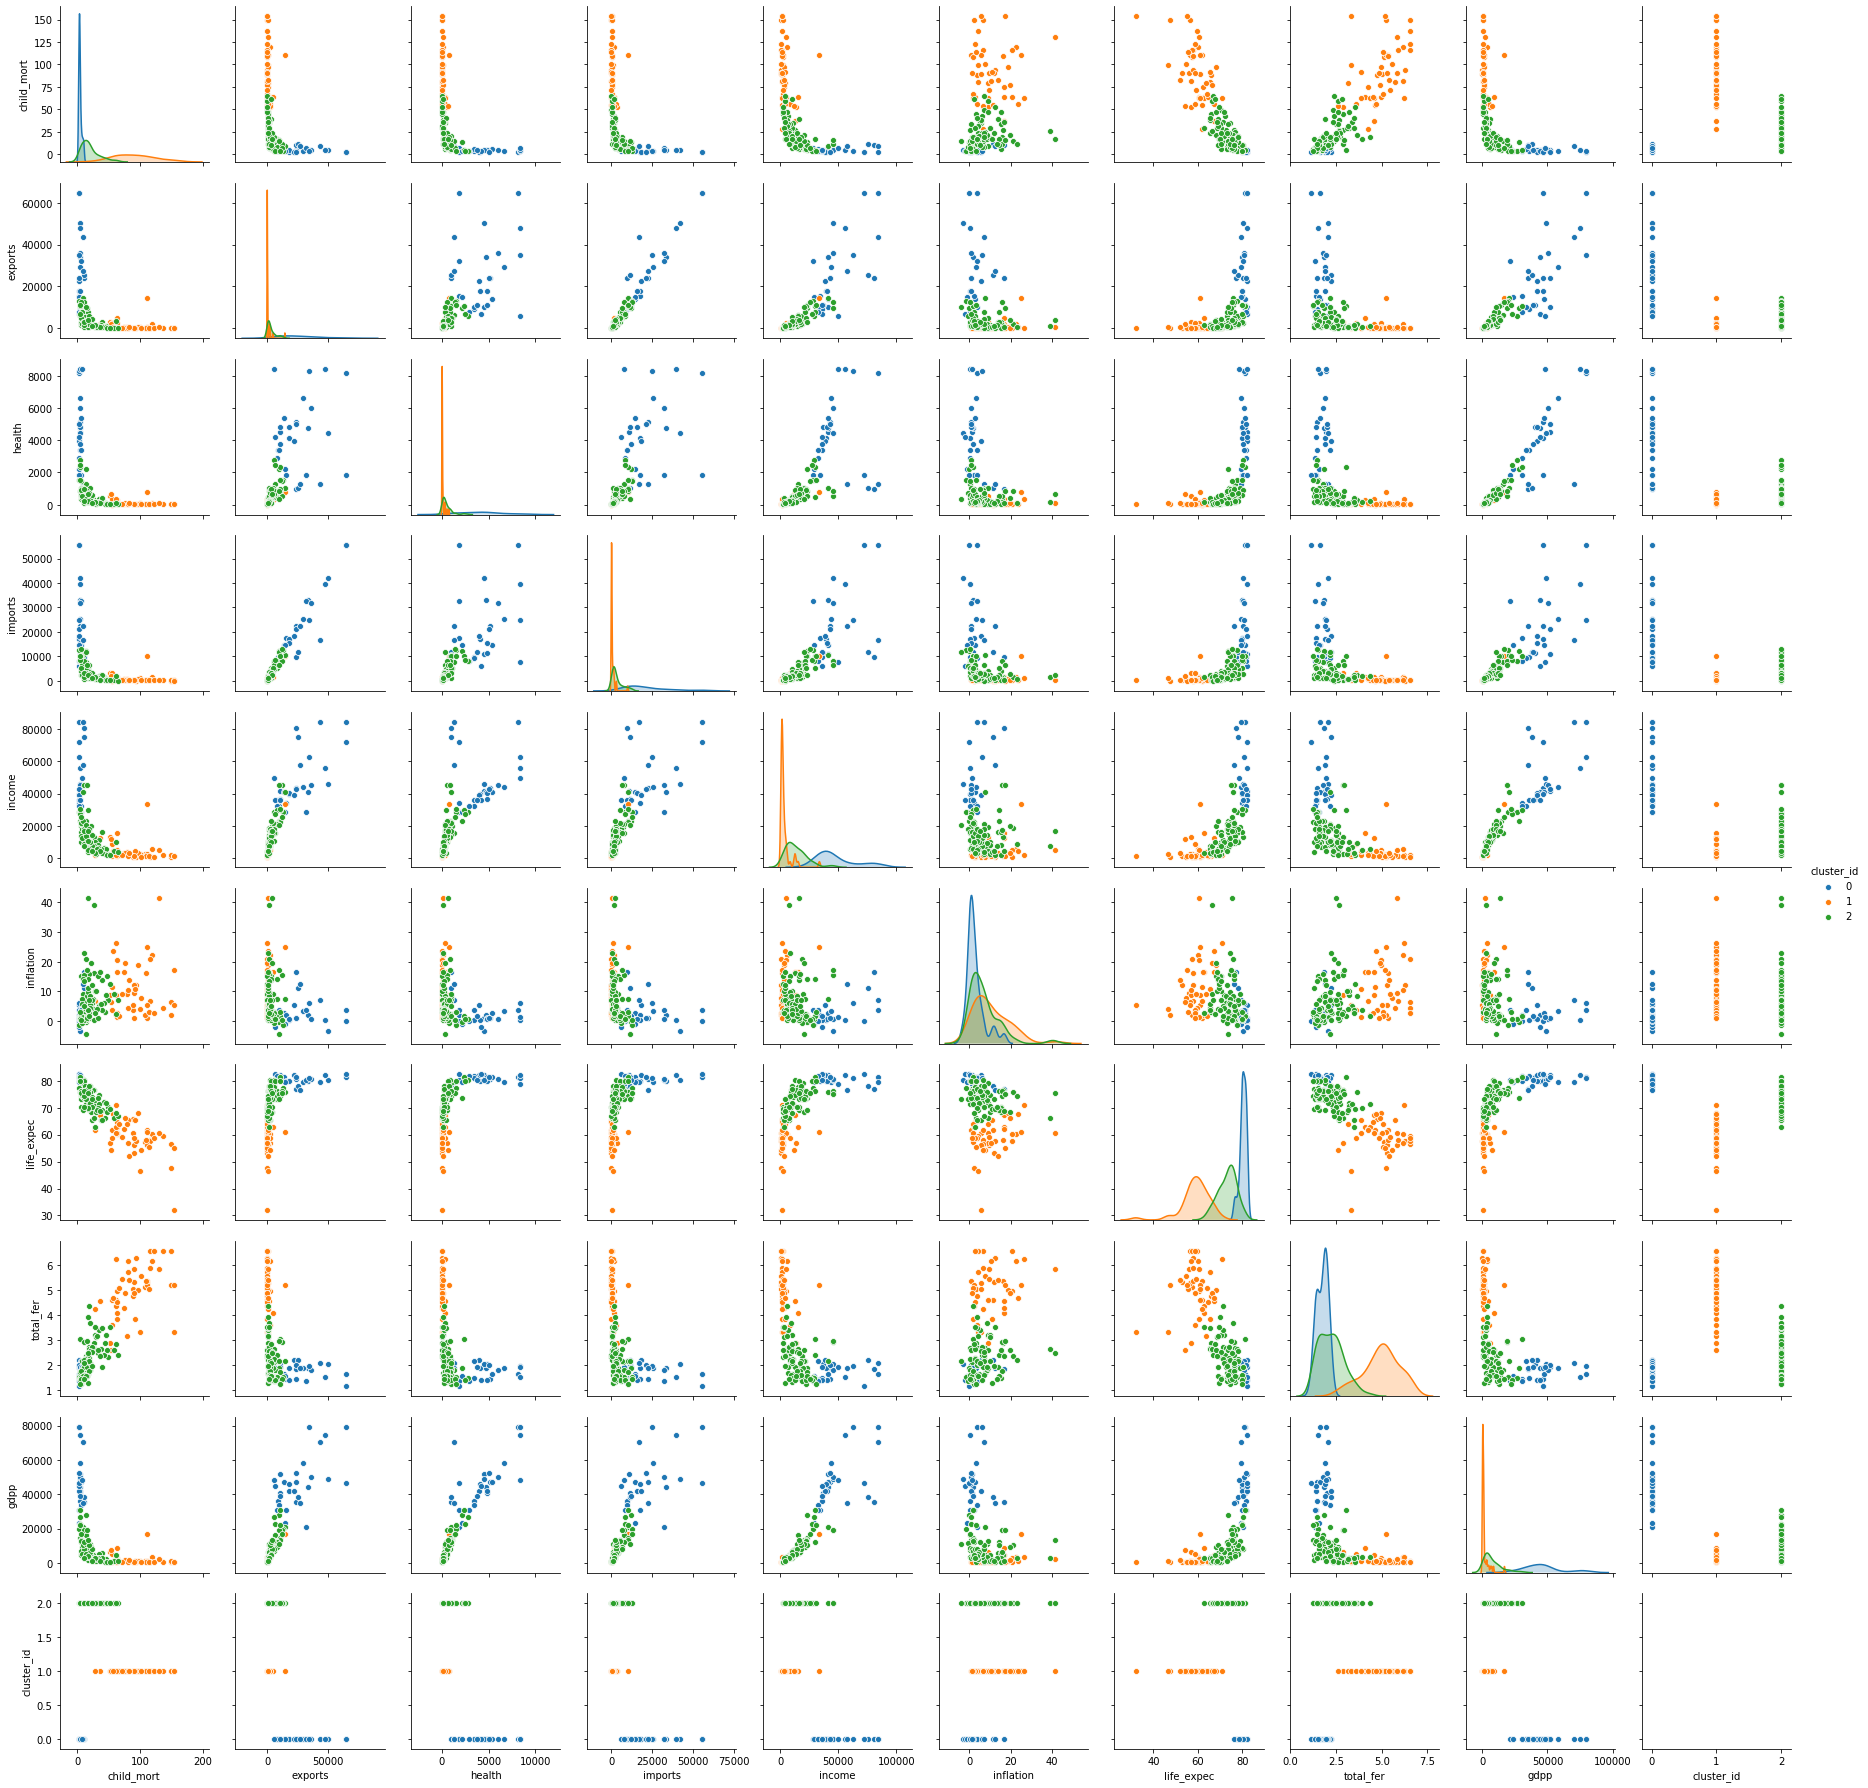

In [135]:
sns.pairplot(Country_df[columns+['cluster_id']],hue='cluster_id')

### visualizing the data using gdpp,child mort and income

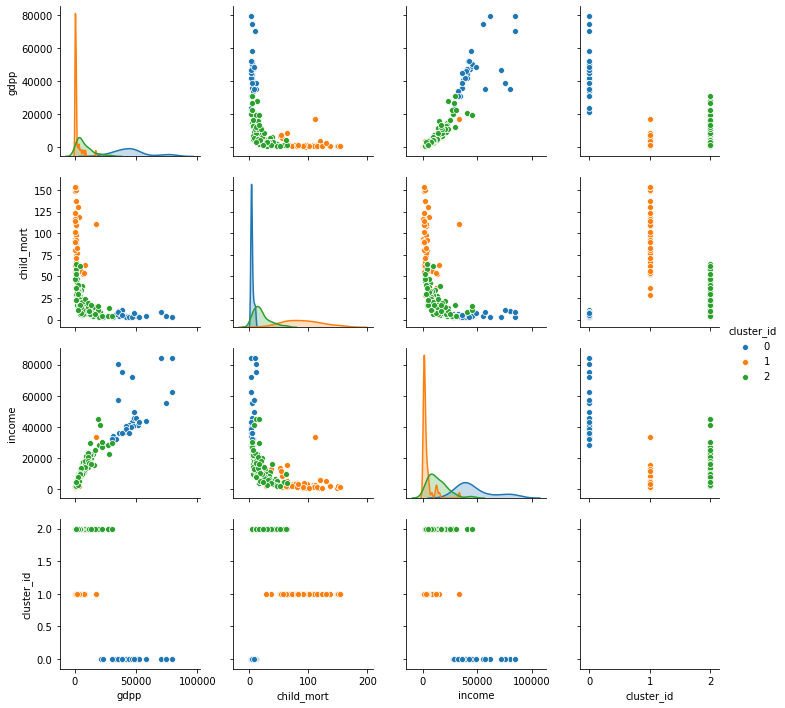

In [136]:
# visualizing the data using gdpp,child mort and income with hue cluster id
sns.pairplot(Country_df[['gdpp','child_mort','income','cluster_id']],hue='cluster_id')

### Performing Bivariate analysis with gdpp,child_mort and income

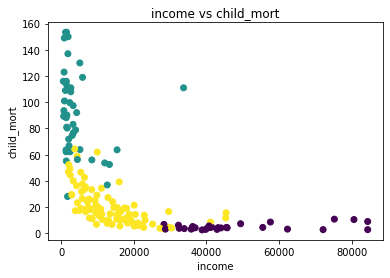

In [137]:
col1,col2="income",'child_mort'
plt.scatter(Country_df[col1],Country_df[col2],c=Country_df['cluster_id'])
plt.title(f"{col1} vs {col2}")
plt.xlabel(col1)
plt.ylabel(col2)
plt.show()

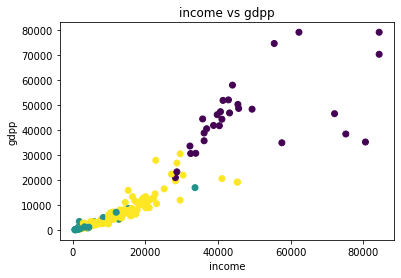

In [138]:
col1,col2="income",'gdpp'
plt.scatter(Country_df[col1],Country_df[col2],c=Country_df['cluster_id'])
plt.title(f"{col1} vs {col2}")
plt.xlabel(col1)
plt.ylabel(col2)
plt.show()

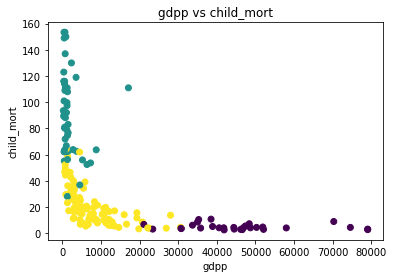

In [139]:
col1,col2="gdpp",'child_mort'
plt.scatter(Country_df[col1],Country_df[col2],c=Country_df['cluster_id'])
plt.title(f"{col1} vs {col2}")
plt.xlabel(col1)
plt.ylabel(col2)
plt.show()

### Cluster Profiling

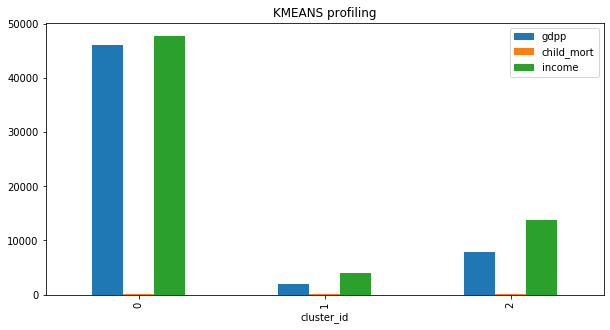

In [140]:
mainCols=['gdpp','child_mort','income']
Country_df[mainCols+['cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar',figsize=(10,5))
plt.title("KMEANS profiling")
plt.show()

### Country Identification 

### Finding the top 5 countries that belong to the certain cluster which needs funding from Help International

In [141]:
Country_df[Country_df['cluster_id']==1][['country']+mainCols].sort_values(by=['gdpp','child_mort','income'], ascending=[True,False,True]).head(5)

,country,gdpp,child_mort,income
26,Burundi,231.0,93.6,764.0
88,Liberia,327.0,89.3,700.0
37,"Congo, Dem. Rep.",334.0,116.0,609.0
112,Niger,348.0,123.0,814.0
132,Sierra Leone,399.0,153.4,1220.0


### Comment :
    Above are the top five countries that needs funding, Found the countries by using K-means clustering with K=3

## Hiearchical clustering

### Single Linkage method

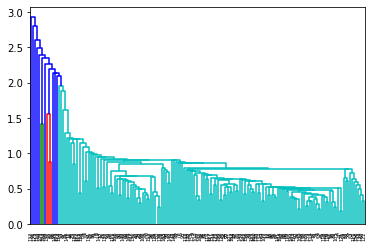

In [142]:
# single linkage
mergings = linkage(Country_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

### Complete linkage method

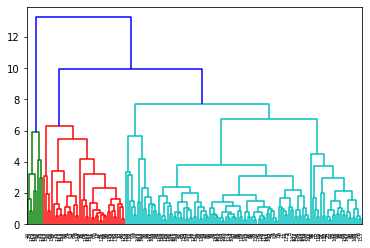

In [143]:
# complete linkage
mergings = linkage(Country_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

### Using complete linkage method

In [144]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [145]:
# assign cluster labels
Country_df['cluster_labels'] = cluster_labels
Country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2,1


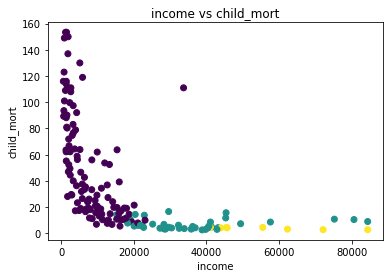

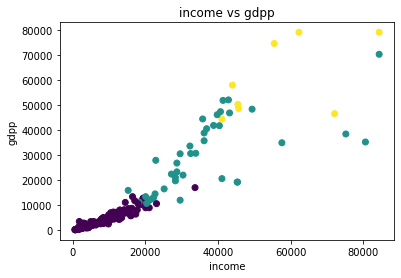

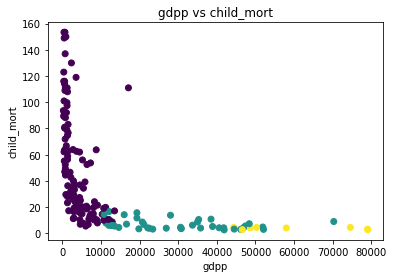

In [146]:
#Visualize the cluster using income,gdpp and child mort
plotcols=[("income",'child_mort'),
("income",'gdpp'),
("gdpp",'child_mort')]
for colpair in plotcols:
    col1,col2=colpair
    plt.scatter(Country_df[col1],Country_df[col2],c=Country_df['cluster_labels'])
    plt.title(f"{col1} vs {col2}")
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

### Cluster Profiling

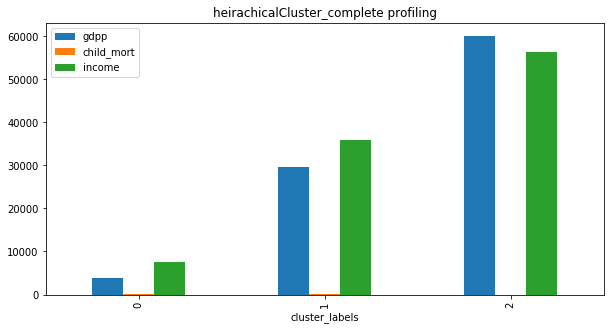

In [147]:
mainCols=['gdpp','child_mort','income']
Country_df[mainCols+['cluster_labels']].groupby('cluster_labels').mean().plot(kind = 'bar',figsize=(10,5))
plt.title("heirachicalCluster_complete profiling")
plt.show()


### Country Identification 

### Finding the top 5 countries that belong to the certain cluster which needs funding from Help International using Complete linkage hierarchical clustering

In [148]:
Country_df[Country_df['cluster_labels']==0][['country']+mainCols].sort_values(by=['gdpp','child_mort','income'], ascending=[True,False,True]).head(5)

,country,gdpp,child_mort,income
26,Burundi,231.0,93.6,764.0
88,Liberia,327.0,89.3,700.0
37,"Congo, Dem. Rep.",334.0,116.0,609.0
112,Niger,348.0,123.0,814.0
132,Sierra Leone,399.0,153.4,1220.0


### Analysis

### Top 5 countries that are in need for aid